In [1]:
## Load necessary libraries
%matplotlib inline
from constructIDF import *
import pandas as pd
import numpy as np
import itertools
import argparse
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14

### Step 1: Read file with daily rainfall records from MACA.

The data used in this example was downloaded from the MACA portal. The data corresponds to downscaled daily rainfall observations from 10 different GCM extracted from the closest grid cell center to Ann Arbor lat, lon coordinates (Latitude:42.2981, Longitude:-83.6639)

In [2]:
# Specify path to hourly rainfall time series

## REMEMBER to change the path to where the historical data from MACA was stored.

historical_path = "/Users/tanialopez/Documents/cmu/spring20/classActivities/HW1-2/historical_data.csv"

In [3]:
## Reading data in
## Historical_data is the historical MACA data for Ann Arbor.

historical_data = pd.read_csv(historical_path, skiprows=26, parse_dates=["yyyy-mm-dd"])

In [4]:
## Reformatting data so that it is in the format 
## required by the methods we used in HW1

historical_data['year'] = historical_data["yyyy-mm-dd"].dt.year

#The following line of code gets the maximum daily rainfall 
# on each year
historicalAMS = historical_data.groupby(pd.Grouper(key="yyyy-mm-dd", freq='A')).max()


cols = list(historicalAMS)
cols.insert(0, cols.pop(cols.index('year')))
historicalAMS = historicalAMS.loc[:, cols]
out = historicalAMS.reset_index(drop=True)

In [5]:
#Take a look

#########################
#  Historical Model     #
#     AMS TABLE         #
#                       #
#########################

out

,year,pr_bcc-csm1-1_historical(mm),pr_bcc-csm1-1-m_historical(mm),pr_BNU-ESM_historical(mm),pr_CanESM2_historical(mm),pr_CCSM4_historical(mm),pr_CNRM-CM5_historical(mm),pr_CSIRO-Mk3-6-0_historical(mm),pr_GFDL-ESM2M_historical(mm),pr_GFDL-ESM2G_historical(mm),pr_HadGEM2-CC365_historical(mm)
0,1950,32.170700,28.330273,25.961569,41.700222,23.778496,40.512627,30.651091,34.664284,40.512627,40.512627
1,1951,38.417217,30.189684,28.345760,51.715496,38.092495,29.494617,34.913235,46.009525,38.343445,47.898281
2,1952,40.362488,36.423500,53.989502,47.898281,40.362488,39.591415,24.854980,46.715599,42.725613,33.969921
3,1953,35.092014,34.664284,52.026752,41.975277,38.320995,30.128036,27.875061,35.953228,27.804882,36.172832
4,1954,44.760929,51.715496,42.725613,32.958679,40.126492,45.494953,39.536640,38.991837,58.161530,38.063091
5,1955,46.608860,28.903296,47.898281,41.021931,35.660465,35.062305,40.512627,52.803215,40.023609,65.595009
6,1956,46.715599,65.595009,36.172832,28.345760,35.062305,38.320995,34.205025,32.816669,41.021931,27.459637
7,1957,32.048145,41.975277,44.760929,47.190266,36.778805,35.092014,26.854403,38.343445,45.494953,37.490189
8,1958,65.595009,52.026752,31.787653,34.985138,26.592812,36.684879,42.941067,32.277603,28.192711,41.700222
9,1959,38.063091,46.715599,39.570255,31.305250,30.741625,52.026752,33.897297,42.725613,30.758911,25.397488


### Step 2: Construct Annual Maximum Series

We only have daily observations, so we can only do starting
from 24. We will only create 24-hour IDF curves in this tutorial.

In [6]:
# To save the data above as a csv file, uncomment this cell and 
# change the savepath to your own desired location.


#--- To uncomment remove "#" from next line:

# save_path = ""

# out.to_csv(savepath)

### Step 3: Fit Generalized Extreme Value and obtain rainfall depths

The next step is to fit a generalized extreme value distribution to each duration's AMS. Once the parameters (location, scale and shape) are estimated, these are used to retrieve the return levels (in this case, rainfall depth) for different quantiles feed into the inverse of the CDF. Usually, the quantiles are equal to the inverse of the average recurrence interval (ARI) (e.g. 1/2 = 2-year).

`constructIDF` has one method that merges all these steps, but we need to specify if we want to construct confidence intervals. The method implemented in `constructIDF` is bootstrapping, so we also need to specify the number of bootsrapped samples. Default value is 1000, and using a smaller number is not recommended.

Other specification is the confidence level, alpha, used to estimate the confidence intervals. Default is 0.9 (90% confidence interval).


In this tutorial, we will compute confidence intervals at a 90% confidence level using 1000 bootstrapped samples.

```python
ci = True
alpha = 0.9
number_bootstrap = 1000
```

In [7]:
# Specifying values #

ci = True
alpha = 0.9
number_bootstrap = 100

In [8]:
# Feeding the data and our specifications to the method.

data = IDF(out, ci, number_bootstrap, alpha)

In [9]:
# Construct IDF from the data we feed above and our specifications.
# Some errors will be displayed, no worries. This will take long time because
# of the number of bootsrapped samples.
# The constructed IDF is by default for the following ARI:
# 2-, 5-, 10-, 25-, 50-, 100-, 200-year

data.construct_IDF()


/Users/tanialopez/anaconda3/lib/python3.6/site-packages/scipy/stats/_continuous_distns.py:2552: RuntimeWarning: invalid value encountered in subtract
  -pex2+logpex2-logex2)


In [10]:
######################################
#                                    # 
#          Historical Model          #
#             IDF TABLE              #
#                                    #
######################################

## We can access the dataframe with confidence bounds:

## Note that we no longer have "DURATIONS" by column. 
## We only did for one duration since we only have daily data.
## Now, each column corresponds to the 24-hour historical IDF
## curve for each model.

data.idf

,pr_bcc-csm1-1_historical(mm),pr_bcc-csm1-1-m_historical(mm),pr_BNU-ESM_historical(mm),pr_CanESM2_historical(mm),pr_CCSM4_historical(mm),pr_CNRM-CM5_historical(mm),pr_CSIRO-Mk3-6-0_historical(mm),pr_GFDL-ESM2M_historical(mm),pr_GFDL-ESM2G_historical(mm),pr_HadGEM2-CC365_historical(mm)
L2-yr,37.071502,36.457006,37.444682,35.816657,36.521026,35.990786,34.593174,36.847273,36.463809,36.529557
L5-yr,44.516145,44.254525,44.279372,43.740148,44.094398,44.198879,43.007145,44.799915,44.201933,43.930243
L10-yr,49.517389,49.482491,48.701732,48.934238,49.088666,48.822381,49.413228,49.911381,49.095273,48.650590
L25-yr,53.889904,54.173463,54.725743,54.504845,54.506775,53.359537,56.043960,56.079571,55.059010,53.351694
L50-yr,57.022268,57.198659,58.789430,58.018082,57.794239,56.640063,60.181956,60.235630,59.236543,56.666712
L100-yr,60.432525,60.070008,62.753663,61.140250,60.373933,59.751948,64.382295,63.882141,63.200974,59.594434
L200-yr,61.718839,62.616779,66.070374,64.057533,63.030433,62.300340,68.882218,66.766360,67.228757,62.218530
2-yr,39.459619,38.777900,39.407260,38.106304,38.593001,38.477801,36.984563,38.974825,37.947752,38.417404
5-yr,47.460905,47.422131,47.761631,46.504197,47.532954,47.116960,46.137589,47.279314,46.550692,46.628150
10-yr,52.546547,52.657671,53.084317,51.971772,52.844879,52.595758,52.697607,53.441726,52.541984,52.071704


### Step 3: Obtain IDF values from future data

Now, we need to repeat the same process but inputing the
future model data.

In [11]:
future_path = "/Users/tanialopez/Documents/cmu/spring20/classActivities/HW1-2/future_data.csv"

In [12]:
## Reading data in
## Historical_data is the historical MACA data for Ann Arbor.

future_data = pd.read_csv(future_path, skiprows=26, parse_dates=["yyyy-mm-dd"])

In [13]:
## Reformatting data so that it is in the format 
## required by the methods we used in HW1

future_data['year'] = future_data["yyyy-mm-dd"].dt.year

#The following line of code gets the maximum daily rainfall 
# on each year
futureAMS = future_data.groupby(pd.Grouper(key="yyyy-mm-dd", freq='A')).max()


cols = list(futureAMS)
cols.insert(0, cols.pop(cols.index('year')))
futureAMS = futureAMS.loc[:, cols]
future_out = futureAMS.reset_index(drop=True)

In [14]:
#Take a look

#########################
#  Historical Model     #
#     AMS TABLE         #
#                       #
#########################

future_out

,year,pr_bcc-csm1-1_rcp85(mm),pr_bcc-csm1-1-m_rcp85(mm),pr_BNU-ESM_rcp85(mm),pr_CanESM2_rcp85(mm),pr_CCSM4_rcp85(mm),pr_CNRM-CM5_rcp85(mm),pr_CSIRO-Mk3-6-0_rcp85(mm),pr_GFDL-ESM2M_rcp85(mm),pr_GFDL-ESM2G_rcp85(mm),pr_HadGEM2-CC365_rcp85(mm)
0,2006,41.762489,65.705200,41.413303,44.896496,40.287437,49.113220,32.486240,49.317863,39.887020,66.769920
1,2007,38.984734,28.114281,31.947811,46.017780,29.723171,33.605335,54.532627,43.626713,77.920204,45.774925
2,2008,45.069363,34.916054,36.909401,42.551731,62.972191,42.009243,62.468037,31.248665,52.733070,35.564102
3,2009,48.521442,42.810760,33.440716,79.665039,27.621651,42.226654,39.272945,41.084148,32.946880,33.020657
4,2010,56.192223,34.005508,30.876858,47.956028,40.311985,38.033913,57.396362,29.048100,35.026276,25.479580
5,2011,32.948307,78.111465,30.275681,53.245522,32.609035,50.956348,33.942802,38.154999,42.439518,41.509102
6,2012,44.667282,55.735611,48.518406,33.023602,47.354401,42.440079,106.742500,35.227810,60.910507,25.867962
7,2013,36.793396,34.378925,42.378456,22.895462,31.897778,39.370762,50.096195,53.535370,66.857185,47.343544
8,2014,37.680214,52.181297,37.767151,43.155308,30.192486,37.534046,36.844730,47.618202,39.964985,50.403439
9,2015,36.773064,51.475437,80.702110,35.786327,42.850693,43.854259,95.317520,38.230331,40.249603,41.111614


In [15]:
# Feeding the data and our specifications to the method,
# same as when we calculated the historical model IDF values.

future_data = IDF(future_out, ci, number_bootstrap, alpha)

In [16]:
# Construct IDF from the data we feed above and our specifications.
# Some errors will be displayed, no worries. This will take long time because
# of the number of bootsrapped samples.
# The constructed IDF is by default for the following ARI:
# 2-, 5-, 10-, 25-, 50-, 100-, 200-year

future_data.construct_IDF()


In [17]:
######################################
#                                    # 
#          Future Model              #
#           IDF TABLE                #
#                                    #
######################################

## We can access the dataframe with confidence bounds:

## Note that we no longer have "DURATIONS" by column. 
## We only did for one duration since we only have daily data.
## Now, each column corresponds to the 24-hour historical IDF
## curve for each model.

future_data.idf

,pr_bcc-csm1-1_rcp85(mm),pr_bcc-csm1-1-m_rcp85(mm),pr_BNU-ESM_rcp85(mm),pr_CanESM2_rcp85(mm),pr_CCSM4_rcp85(mm),pr_CNRM-CM5_rcp85(mm),pr_CSIRO-Mk3-6-0_rcp85(mm),pr_GFDL-ESM2M_rcp85(mm),pr_GFDL-ESM2G_rcp85(mm),pr_HadGEM2-CC365_rcp85(mm)
L2-yr,44.355829,42.090873,39.726107,41.794772,39.923304,41.254372,46.522245,43.637003,44.352828,44.206252
L5-yr,55.379171,54.327600,48.358363,56.902449,49.989759,51.077349,60.041119,53.948497,56.746580,56.131421
L10-yr,63.194782,63.519339,54.074459,69.298709,56.533413,57.604811,69.054314,60.914582,63.778553,63.483318
L25-yr,72.026140,74.189611,61.797021,88.743048,64.200640,65.218865,79.933200,68.723606,72.599470,72.359244
L50-yr,78.534436,82.702383,67.374924,106.408277,69.331227,71.152861,88.790814,74.937097,78.254139,78.822809
L100-yr,84.846075,90.751957,72.484951,123.868564,74.502378,76.311420,97.987746,80.235876,84.247041,86.313964
L200-yr,91.113941,98.691900,77.260845,143.747498,79.146140,81.573549,106.885093,84.706234,90.273217,93.925070
2-yr,46.226404,44.747055,40.877620,43.942360,41.973119,43.062936,48.642522,45.826031,46.838367,45.872456
5-yr,58.983731,58.275368,50.828267,62.152937,52.725880,53.873129,64.182697,58.095115,60.142976,59.726244
10-yr,68.482462,68.418923,57.778925,78.606174,60.205977,61.377811,76.108663,66.874489,69.777968,69.645511


In [18]:
## Find change factors by finding the ratio between
## historical IDF model values and future IDF model values.

## Find change factor

change_factors = pd.DataFrame(future_data.idf.values/data.idf.values)

In [19]:
## Make table look pretty and understandable 
change_factors.columns = [x.rstrip("_rcp85(mm)") for x in future_data.idf.columns]
change_factors['return_period'] = future_data.idf.index
change_factors.set_index('return_period', inplace=True)

In [20]:
####################################
#                                  # 
#          Change Factors          #
#             TABLE                #
#                                  #
####################################

change_factors

,pr_bcc-csm1-1,pr_bcc-csm1-1-,pr_BNU-ESM,pr_CanESM2,pr_CCSM4,pr_CNRM-CM,pr_CSIRO-Mk3-6-0,pr_GFDL-ESM2M,pr_GFDL-ESM2G,pr_HadGEM2-CC36
return_period,,,,,,,,,,
L2-yr,1.196494,1.154535,1.060928,1.166909,1.093159,1.146248,1.344839,1.184267,1.216352,1.210150
L5-yr,1.244024,1.227617,1.092119,1.300920,1.133699,1.155625,1.396073,1.204210,1.283803,1.277740
L10-yr,1.276214,1.283673,1.110319,1.416160,1.151659,1.179885,1.397486,1.220455,1.299077,1.304883
L25-yr,1.336542,1.369483,1.129213,1.628168,1.177847,1.222253,1.426259,1.225466,1.318576,1.356269
L50-yr,1.377259,1.445880,1.146038,1.834054,1.199622,1.256228,1.475373,1.244066,1.321045,1.390990
L100-yr,1.403980,1.510770,1.155071,2.025974,1.234016,1.277137,1.521967,1.255999,1.333002,1.448356
L200-yr,1.476274,1.576125,1.169372,2.244037,1.255681,1.309360,1.551708,1.268696,1.342777,1.509600
2-yr,1.171486,1.153932,1.037312,1.153152,1.087584,1.119163,1.315211,1.175785,1.234286,1.194054
5-yr,1.242786,1.228864,1.064207,1.336502,1.109249,1.143391,1.391115,1.228764,1.291989,1.280905


We can construct the future IDF at Ann Arbor by updating the historical curve (from Homework 1 Part I) with the climate signal that we estimated from the downscaled projections. 
Note that there are two options here:

1. Assume equal change in all storm durations to the estimated change in the 24-h rainfall depth (the change factors we computed above). 
2. Update the 24-hour only.

Option 1 entails a strong assumption, and there is evidence that shorter duration extremes will change substantially more than longer duration extremes You can read this paper here: 

    Prein, A. F., Rasmussen, R. M., Ikeda, K., Liu, C., Clark, M. P., & Holland, G. J. (2017). The future intensification of hourly precipitation extremes. Nature Climate Change, 7(1), 48–52. https://doi.org/10.1038/nclimate3168
    

Therefore, in this homework we will go by Option 2.


In [29]:
# Loading idf values from historical 24-hour duration IDF curve at Ann Arbor
# You just need to change the path to where you saved the HW1-2 folder from Canvas:

#
path_canvas = "/Users/tanialopez/Documents/cmu/spring20/classActivities/HW1-2" # specify here

name_file = "AnnArbor_24h_values.csv"

In [30]:
observed_idf = pd.read_csv(f"{path_canvas}/{name_file}", index_col=0)

In [23]:
observed_idf

,24H
L2-yr,1.981448
L5-yr,2.540663
L10-yr,2.891310
L25-yr,3.272468
L50-yr,3.534629
L100-yr,3.756192
L200-yr,3.958497
2-yr,2.116097
5-yr,2.747861
10-yr,3.188775


In [24]:
######################################
#                                    # 
#        Future Ann Arbor            #
#           IDF TABLE                #
#                                    #
######################################


updated_idf = change_factors.multiply(observed_idf["24H"], axis="index")

In [25]:
## Take a look

updated_idf

,pr_bcc-csm1-1,pr_bcc-csm1-1-,pr_BNU-ESM,pr_CanESM2,pr_CCSM4,pr_CNRM-CM,pr_CSIRO-Mk3-6-0,pr_GFDL-ESM2M,pr_GFDL-ESM2G,pr_HadGEM2-CC36
return_period,,,,,,,,,,
L2-yr,2.370791,2.287650,2.102174,2.312169,2.166039,2.271231,2.664729,2.346563,2.410139,2.397850
L5-yr,3.160647,3.118961,2.774707,3.305200,2.880346,2.936055,3.546951,3.059491,3.261711,3.246306
L10-yr,3.689930,3.711496,3.210276,4.094557,3.329803,3.411414,4.040566,3.528713,3.756035,3.772820
L25-yr,4.373792,4.481588,3.695314,5.328128,3.854467,3.999785,4.667387,4.010298,4.314997,4.438347
L50-yr,4.868100,5.110648,4.050819,6.482699,4.240218,4.440302,5.214895,4.397312,4.669404,4.916632
L100-yr,5.273619,5.674741,4.338669,7.609948,4.635200,4.797171,5.716801,4.717772,5.007012,5.440304
L200-yr,5.843828,6.239088,4.628956,8.883016,4.970611,5.183096,6.142432,5.022131,5.315378,5.975746
2-yr,2.478979,2.441832,2.195053,2.440182,2.301433,2.368258,2.783115,2.488076,2.611868,2.526734
5-yr,3.415002,3.376748,2.924293,3.672520,3.048061,3.141880,3.822590,3.376472,3.550205,3.519749


#### For this homework, you will have to perform some statistics, you can directly do them here if you are a python-user. Otherwise, you need to save the data above as a .csv and open in Excel. To  save the data above uncomment the following cell and specify the folder where to save in the save_path variable.

Example: save_path = "\Users\tanialopez\Downloads\"

In [26]:
# save_path = "" 
# save_name = "AnnArbor_updated_IDF.csv"

# updated_idf.to_csv(f"{save_path}\{save_name}")

### Step 3: Generate IDF curves

We can call the `plot_IDF` method to create the IDF curves and plot them.
We need to pass the path where the original data was stored, a path where to store
the figure and its format.

In [27]:
savepath = "/Users/tanialopez/historicalIDF"

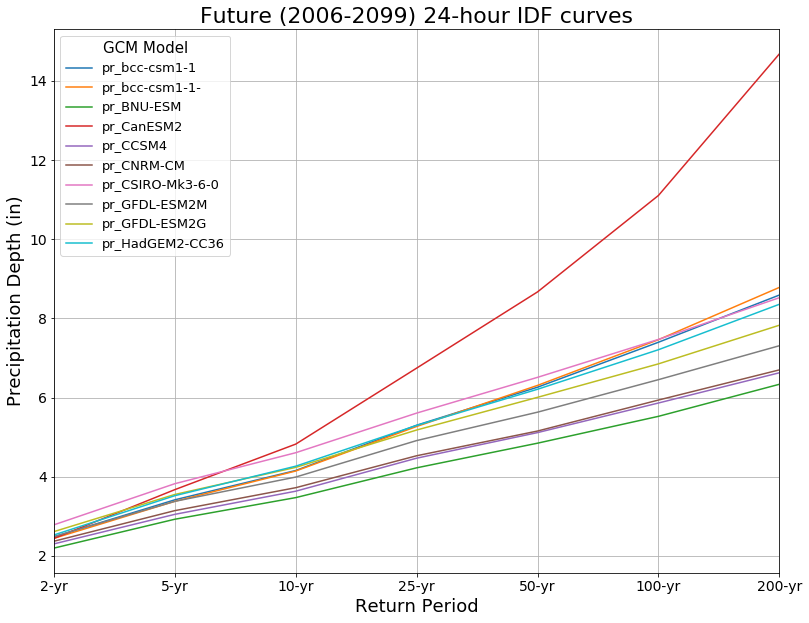

In [28]:
# This part generates a plot and saves in your folder specified above

# Hard coded params
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
idf_transposed = updated_idf.transpose()
dfmean = idf_transposed.drop([x for x in idf_transposed.columns if (
                x[:1] == 'L' or x[:1] == 'U')], axis=1)

dfmean = dfmean.transpose()
fig, axs = plt.subplots(figsize=(13, 10))
a1 = dfmean.plot(ax=axs)
fill_alpha = 0.3

legend = plt.legend(title='GCM Model', fontsize=13)
plt.setp(legend.get_title(), fontsize=15)
plt.ylabel('Precipitation Depth (in)', {'fontsize': 18})
plt.xlabel('Return Period', {'fontsize': 18})
plt.title('Future (2006-2099) 24-hour IDF curves', fontsize=22)
plt.grid()

plt.savefig("{}/Figure.{}".format(savepath,
                                          'png'), bbox_inches='tight')